In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# Reading Data

In [3]:
df = pd.read_csv('../Dataset/NSL_new.csv')

In [4]:
df = df.sample(n=4000)

In [5]:
X = df.drop(['label'], axis=1)
y = df['label']

In [6]:
scoring_metrics = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average="micro"),
           'recall' : make_scorer(recall_score, average="micro"), 
           'f1_score' : make_scorer(f1_score, average="micro")}

In [7]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
44973,0,330,10233,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
75140,0,311,1576,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
73395,0,320,1896,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
94150,0,6,360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
120792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune


In [8]:
X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
44973,0,330,10233,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
75140,0,311,1576,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
73395,0,320,1896,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94150,0,6,360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
120792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
y.head()

44973      normal
75140      normal
73395      normal
94150      normal
120792    neptune
Name: label, dtype: object

In [10]:
y = y.replace( to_replace =  'normal' , value = 0 )

y = y.replace( to_replace =  'neptune' , value = 1 )
y = y.replace( to_replace =  'back' , value = 1 )
y = y.replace( to_replace =  'land' , value = 1 )
y = y.replace( to_replace =  'pod' , value = 1 )
y = y.replace( to_replace =  'smurf' , value = 1 )
y = y.replace( to_replace =  'teardrop' , value = 1 )
y = y.replace( to_replace =  'mailbomb' , value = 1 )
y = y.replace( to_replace =  'apache2' , value = 1 )
y = y.replace( to_replace =  'processtable' , value = 1 )
y = y.replace( to_replace =  'udpstorm' , value = 1 )
y = y.replace( to_replace =  'worm' , value = 1 )

y = y.replace( to_replace =  'ipsweep' , value = 2 )
y = y.replace( to_replace =  'nmap' , value = 2 )
y = y.replace( to_replace =  'portsweep' , value = 2 )
y = y.replace( to_replace =  'satan' , value = 2 )
y = y.replace( to_replace =  'mscan' , value = 2 )
y = y.replace( to_replace =  'saint' , value = 2 )

y = y.replace( to_replace =  'ftp_write' , value = 3 )
y = y.replace( to_replace =  'guess_passwd' , value = 3 )
y = y.replace( to_replace =  'imap' , value = 3)
y = y.replace( to_replace =  'multihop' , value = 3 )
y = y.replace( to_replace =  'phf' , value = 3 )
y = y.replace( to_replace =  'spy' , value = 3 )
y = y.replace( to_replace =  'warezclient' , value = 3 )
y = y.replace( to_replace =  'warezmaster' , value = 3 )
y = y.replace( to_replace =  'sendmail' , value = 3 )
y = y.replace( to_replace =  'snmpgetattack' , value = 3 )
y = y.replace( to_replace =  'snmpguess' , value = 3 )
y = y.replace( to_replace =  'xlock' , value = 3 )
y = y.replace( to_replace =  'xsnoop' , value = 3 )
y = y.replace( to_replace =  'httptunnel' , value = 3 )

y = y.replace( to_replace =  'buffer_overflow' , value = 4 )
y = y.replace( to_replace =  'loadmodule' , value = 4 )
y = y.replace( to_replace =  'perl' , value = 4 )
y = y.replace( to_replace =  'rootkit' , value = 4 )
y = y.replace( to_replace =  'ps' , value = 4 )
y = y.replace( to_replace =  'sqlattack' , value = 4  )
y = y.replace( to_replace =  'xterm' , value = 4 )

y = y.replace( to_replace =  'unknown' , value = 5 )

In [11]:
y.head()

44973     0
75140     0
73395     0
94150     0
120792    1
Name: label, dtype: int64

# Principle Component Analysis (PCA)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [13]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


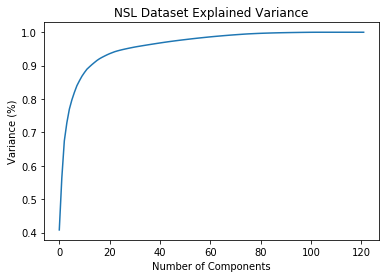

In [17]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('NSL Dataset Explained Variance')
plt.show()

# Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
randomForestModel = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)

In [147]:
randomForestScore = cross_validate(randomForestModel, X, y, cv=4, scoring=scoring_metrics, verbose=3 ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished


In [151]:
randomForestScore = pd.DataFrame(randomForestScore)

In [187]:
randomForestScore.to_csv('NSL_RandomForest_scores.csv')

In [42]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [43]:
rf_parameters={'n_estimators' : range(80,200,20),'max_depth': range(1,20,3), 'min_samples_split': np.arange(0.1,1,0.1)}

In [44]:
rf2 = RandomForestClassifier()

In [45]:
dlGrid = GridSearchCV(rf2, rf_parameters, scoring=scoring_metrics, refit='accuracy', verbose=3, n_jobs=-1, cv=3)

In [46]:
dlGrid.fit(X, y)

Fitting 3 folds for each of 378 candidates, totalling 1134 fits


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 1134 out of 1134 | elapsed:   53.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(80, 200, 20), 'max_depth': range(1, 20, 3), 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn', scoring={'accuracy'}, verbose=3)

In [47]:
dtGridScores = pd.DataFrame(dlGrid.cv_results_)
dtGridScores.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.140919,0.002159,0.019322,0.000471,1,0.1,80,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.857784,0.848576,0.869173,0.8585,0.00842,197,0.858859,0.861965,0.854682,0.858502,0.002984
1,0.201884,0.025138,0.052970,0.032600,1,0.1,100,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.857784,0.848576,0.869173,0.8585,0.00842,197,0.859610,0.860465,0.853933,0.858002,0.002899
2,0.215875,0.007479,0.029983,0.001632,1,0.1,120,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.857784,0.850075,0.869173,0.8590,0.00784,134,0.860360,0.863466,0.854682,0.859503,0.003637
3,0.272509,0.016530,0.038311,0.005433,1,0.1,140,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.857784,0.848576,0.869173,0.8585,0.00842,197,0.859610,0.863466,0.853184,0.858753,0.004241
4,0.296496,0.005433,0.040310,0.001884,1,0.1,160,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.857784,0.850075,0.869173,0.8590,0.00784,134,0.861111,0.863466,0.853933,0.859503,0.004055


In [48]:
dt3=dlGrid.best_estimator_

In [49]:
dtFinalScore = cross_validate(dt3, X, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


In [50]:
pd.DataFrame(dtFinalScore)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,fit_time,score_time,test_accuracy,train_accuracy
0,0.201883,0.019996,0.964215,0.970608
1,0.218875,0.018001,0.964000,0.974667
2,0.217874,0.019002,0.951904,0.960693
3,0.184891,0.014992,0.959839,0.960719


In [51]:
dtFinalScore['test_accuracy'].mean()

0.9599894691936429

# Neural Network

In [159]:
from sklearn.neural_network import MLPClassifier

In [160]:
mlpModel = MLPClassifier()

In [161]:
mlpScore=cross_validate(mlpModel, X, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.9s finished


In [162]:
mlpModel

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [163]:
mlpScore = pd.DataFrame(mlpScore)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\depreca

In [188]:
mlpScore.to_csv('NSL_MLP_scores.csv')

In [140]:
nLayers=[
    (4),
    (7),
    (10), #one layer of 10 nodes
    (13),
    (17),
    (20),
    (30),
    (50),
    (80),
    (100),
    (120),
    (140),
    (180),
    (220),
    (10, 10), #two layers, 10 nodes each
    (20, 20), #two layers, 20 nodes each
    (30, 30),
    (50, 50),
    (80, 80),
    (100, 100),
    (150, 150),
    (10, 10, 10), #three layers, 10 nodes each
    (20, 20, 20),
    (30, 30, 30),
    (50, 50, 50),
    (80, 80, 80),
]

In [141]:
mlp_parameters = {
    'hidden_layer_sizes': nLayers,
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [142]:
X_sample=X.sample(frac=0.2, random_state=1)
y_sample=y.sample(frac=0.2, random_state=1)

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [145]:
from sklearn.neural_network import MLPClassifier
mlpModel2 = MLPClassifier()

In [146]:
mlp_grid = GridSearchCV(mlpModel2, mlp_parameters, scoring=scoring_metrics, refit='accuracy', verbose=3, n_jobs=-1, cv=3)


In [147]:
mlp_grid.fit(X_sample, y_sample)

Fitting 3 folds for each of 312 candidates, totalling 936 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 53.4min
[Parallel(n_jobs=-1)]: Done 936 out of 936 | elapsed: 66.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
             param_grid={'alpha': [0.001, 0.01, 0.05],
                         'hidden_layer_sizes': [4, 7, 10, 13, 17, 20, 30, 50,
                                                80, 100, 120, 140, 180, 220,
                                                (10, 10), (20, 20), (30, 30),
                                

In [189]:
mlpGridScores=pd.DataFrame(mlp_grid.cv_results_)
mlpGridScores.head()
mlpGridScores.to_csv('NSL_ANN_gridsearch.csv')

NameError: name 'mlp_grid' is not defined

In [149]:
mlpFinalModel = mlp_grid.best_estimator_
mlp_grid.best_params_

{'alpha': 0.001,
 'hidden_layer_sizes': (20, 20, 20),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [150]:
mlpFinalScore=cross_validate(mlpFinalModel, X, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.0min finished


In [190]:
mlpFinalScore = pd.DataFrame(mlpFinalScore)
mlpFinalScore.to_csv('NSL_MLP_Scores')

In [152]:
mlpFinalScore['test_accuracy'].mean()

0.9830758110200183

# Decision Trees

In [170]:
from sklearn.tree import tree

In [171]:
dt=tree.DecisionTreeClassifier()

In [172]:
dtScore = cross_validate(dt, X, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


In [173]:
dtScore = pd.DataFrame(dtScore)


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\depreca

In [190]:
dtScore.to_csv('NSL_dtScore_scores.csv')

In [170]:
dt_parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}

In [171]:
dt2 = DecisionTreeClassifier()

In [172]:
dlGrid = GridSearchCV(dt2, dt_parameters, scoring=scoring_metrics, refit='accuracy', verbose=3, n_jobs=-1, cv=4)

In [173]:
dlGrid.fit(X, y)

Fitting 4 folds for each of 250 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.8min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 500, 20)},
             pre

In [191]:
dtGridScores = pd.DataFrame(dlGrid.cv_results_)
dtGridScores.head()
dtGridScores.to_csv('NSL_DT_GridSearch')

In [196]:
dt3=dlGrid.best_estimator_
dlGrid.best_params_

{'max_depth': 19, 'min_samples_split': 10}

In [176]:
dtFinalScore = cross_validate(dt3, X, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s finished


In [194]:
dtFinalScore = pd.DataFrame(dtFinalScore)
dtFinalScore.to_csv('NSL_DT_Scores')
dtFinalScore['test_accuracy'].mean()

0.9975550316296028

# KNN

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
knn = KNeighborsClassifier()

In [177]:
k_range = list(range(1, 101, 5))

In [178]:
param_dict = dict(n_neighbors=k_range)

In [179]:
grid = GridSearchCV(knn, param_dict, cv=4, scoring=scoring_metrics, refit='accuracy', verbose=3, n_jobs=-1)

In [180]:
grid.fit(X, y)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring={'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score, average=micro), 'recall': make_scorer(recall_score, average=micro), 'f1_score': make_scorer(f1_score, average=micro)},
       verbose=3)

In [186]:
knnScore = pd.DataFrame(grid.cv_results_)
knnScore.to_csv('NSL_KNN_GridSearch.csv')

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages

In [182]:
knn2=grid.best_estimator_
grid.best_params_

{'n_neighbors': 1}

In [183]:
knnFinalScore = cross_validate(knn2, X, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.6s finished


In [184]:
pd.DataFrame(knnFinalScore)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\depreca

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1_score,train_f1_score
0,0.062963,0.632724,0.964036,1.0,0.964036,1.0,0.964036,1.0,0.964036,1.0
1,0.068960,0.808621,0.964000,1.0,0.964000,1.0,0.964000,1.0,0.964000,1.0
2,0.049972,0.834605,0.950000,1.0,0.950000,1.0,0.950000,1.0,0.950000,1.0
3,0.052970,0.821613,0.962963,1.0,0.962963,1.0,0.962963,1.0,0.962963,1.0


In [185]:
knnFinalScore.to_csv('NSL_KNN_scores')

AttributeError: 'DeprecationDict' object has no attribute 'to_csv'

In [61]:
pd.DataFrame(linearScore).mean()

fit_time                            0.475388
score_time                          0.014059
test_r2                          -141.704346
test_neg_mean_squared_error    -45841.923804
test_neg_mean_absolute_error      -26.534008
dtype: float64

In [181]:
pd.DataFrame(mlpScore).mean()

fit_time         220.265742
score_time         0.240229
test_accuracy      0.979567
dtype: float64

In [199]:
knnFinalScore = pd.DataFrame(knnFinalScore)
knnFinalScore.to_csv('NSL_KNN_Scores')

# All Results

In [186]:
allResults=pd.concat([
    pd.DataFrame(mlpScore).mean(),
    pd.DataFrame(dtFinalScore).mean(),
    pd.DataFrame(knnFinalScore).mean(),
    pd.DataFrame(ss).mean()
], axis=1)
allResults

,0,1,2,3
fit_time,220.265742,1.370960,12.276757,3467.701033
score_time,0.240229,0.022051,16.329237,505.462763
test_accuracy,0.979567,0.997555,0.995197,0.535075


In [187]:
allResults.rename(columns={0:'Multi-level Perceptron', 1:'Decision Tree', 2:'KNN' , 3:'SVM' },  inplace=True)
allResults

,Multi-level Perceptron,Decision Tree,KNN,SVM
fit_time,220.265742,1.370960,12.276757,3467.701033
score_time,0.240229,0.022051,16.329237,505.462763
test_accuracy,0.979567,0.997555,0.995197,0.535075


# All Results